# UE 4268 - QISKIT Project 2.1


**`vos noms et prenoms`**, `matricule` et `email` 


Department of Physics - Faculty of Science - University of Yaoundé I

`Nom du Laboratoire`

`Date`

## Projet 1.2 Rotation d'un qubit

Le [tutoriel](\url{https://qiskit.org/documentation/stable/0.33/tutorials/operators/02_gradients_framework.html}) sera mis à profit pour ce projet. 

La tâche à accomplir consiste à optimiser deux portes de rotation afin de basculer un seul qubit de l'état $|0\rangle$ à l'état $|1\rangle$.

On souhaite implémenter le circuit quantique suivant :

<img src="./Graphics/rotation_circuit.png" width=300 />

En décomposant cela étape par étape, on commence d'abord avec un qubit dans le
état fondamental $|0\rangle$, et on le fait le pivoter autour de l'axe des x en appliquant la porte

\begin{equation}
\mathtt{R}_x(\phi_1) = e^{-i \phi_1 \sigma_x /2} =
\begin{bmatrix} \cos \frac{\phi_1}{2} &  -i \sin \frac{\phi_1}{2} \\
-i \sin \frac{\phi_1}{2} &  \cos \frac{\phi_1}{2}
\end{bmatrix},
\end{equation}
puis autour de l'axe y via la porte
\begin{equation}
\mathtt{R}_y(\phi_2) = e^{-i \phi_2 \sigma_y/2} =
\begin{bmatrix} \cos \frac{\phi_2}{2} &  - \sin \frac{\phi_2}{2} \\
\sin \frac{\phi_2}{2} &  \cos \frac{\phi_2}{2}
\end{bmatrix}.
\end{equation}
Après ces opérations le qubit est maintenant dans l'état

$$| \psi \rangle = \mathtt{R}_y(\phi_2) \mathtt{R}_x(\phi_1) | 0 \rangle.$$

Enfin, on mesure la valeur moyenne
$\langle \psi \mid \mathtt{Z} \mid \psi \rangle$ de l'opérateur Pauli-Z

\begin{equation}
\mathtt{Z} =
\begin{bmatrix} 1 &  0 \\
0 & -1
\end{bmatrix}.
\end{equation}
De ce qui précède, la valeur moyenne exacte vaut

$$\langle \psi|\mathtt{Z}|\psi \rangle
= \langle 0 |\mathtt{R}_x(\phi_1)^\dagger \mathtt{R}_y(\phi_2)^\dagger \mathtt{Z}\mathtt{R}_y(\phi_2) R_x(\phi_1) |0 \rangle
= \cos(\phi_1)\cos(\phi_2).$$

Selon les paramètres du circuit $\phi_1$ et $\phi_2$, la sortie varie entre $1$ (lorsque
$|\psi\rangle = |0\rangle$) et $-1$ (lorsque
$|\psi\rangle = |0\rangle$).

<p align="center">
<img src="./Graphics/bloch01.png" width=300 />
</p>

1. Importer les modules Qiskit nécessaires et numpy

In [13]:
 from qiskit import QuantumCircuit, transpile
from qiskit.tools.visualization import circuit_drawer, array_to_latex
from qiskit.circuit import Parameter, ParameterVector
from qiskit.primitives import Estimator

from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.extensions import ZGate
from qiskit.quantum_info import SparsePauliOp

import numpy as np

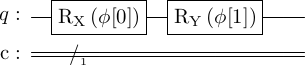

In [7]:
circuit = QuantumCircuit(1, 1)

#Parameters 
parameter_0 = Parameter('\\phi[0]')
parameter_1 = Parameter('\\phi[1]')

#Circuit
circuit.rx(theta = parameter_0, qubit = 0)
circuit.ry(theta = parameter_1, qubit = 0)
circuit.draw('latex')

In [15]:
# Estimator?

# H2 = SparsePauliOp.from_list([("Z", 1)])

# H2

Init signature:
Estimator(
    circuits: 'QuantumCircuit | Iterable[QuantumCircuit] | None' = None,
    observables: 'BaseOperator | PauliSumOp | Iterable[BaseOperator | PauliSumOp] | None' = None,
    parameters: 'Iterable[Iterable[Parameter]] | None' = None,
    options: 'dict | None' = None,
)
Docstring:     
Reference implementation of :class:`BaseEstimator`.

:Run Options:

    - **shots** (None or int) --
      The number of shots. If None, it calculates the exact expectation
      values. Otherwise, it samples from normal distributions with standard errors as standard
      deviations using normal distribution approximation.

    - **seed** (np.random.Generator or int) --
      Set a fixed seed or generator for the normal distribution. If shots is None,
      this option is ignored.
Init docstring:
Args:
    circuits: circuits that represent quantum states.
    observables: observables to be estimated.
    parameters: Parameters of each of the quantum circuits.
        Defaults 

In [11]:
# convert to a state
# psi = CircuitStateFn(circuit)
psi_Z = Estimator.run(
    circuits=[circuit], 
    observables=[ZGate], 
    parameter_values=0.54, 0.12])
print(psi_Z.result())

TypeError: BaseEstimator.run() missing 1 required positional argument: 'self'

In [89]:
two = TwoLocal(1, ['rx','ry'], [], reps=1, insert_barriers=False, skip_final_rotation_layer=True)
# qc = QuantumCircuit(1)
qc = two
# qc.append(two)
qc.decompose().draw()
# two.decompose().draw()

┌──────────┐┌──────────┐
q: ┤ Rx(θ[0]) ├┤ Ry(θ[1]) ├
   └──────────┘└──────────┘

In [69]:
qc = QuantumCircuit(1)
qc.rx(.54, qubit = 0)
qc.ry(.12, qubit = 0)
EvolvedOperatorAnsatz(Operator(Pauli('Z')),qc)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'QuantumCircuit'

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table